Task-4:Location-based Analysis

Performing a geographical analysis of the restaurants in the dataset using their latitude and longitude and grouped by city or locality, to find patterns in distribution,rating, pricing and cuisines

Step-1: Explore and visualize Latitude and Longitude

1. load the dataset and using folium or plotly for interactive maps
2. drop rows with missing coordinates
3. create a map centered at the mean location
4. add restaurant markers

In [2]:
import pandas as pd
import folium
df=pd.read_csv("C:/Users/KAVYA/Documents/Dataset .csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [3]:
df=df.dropna(subset=['Latitude','Longitude'])

In [4]:
map_center=[df['Latitude'].mean(),df['Longitude'].mean()]
restaurant_map=folium.Map(location=map_center,zoom_start=12)

In [6]:
for _, row in df.iterrows():
    folium.Marker(
        [row['Latitude'],row['Longitude']],
        popup=f"{row['Restaurant Name']} | Rating: {row['Aggregate rating']}"
    ).add_to(restaurant_map)

restaurant_map.save('restaurant_map.html')

Step-2:
1. Group by city or locality and count restaurants
2. Visualize top cities with most restaurants(Analyze the concentration of restaurants)

In [9]:
city_counts=df['City'].value_counts().reset_index()
city_counts.columns=['City','restaurant_count']

C:\Users\KAVYA\AppData\Local\Temp\ipykernel_20664\2270551212.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_counts.head(30),x='restaurant_count',y='City',palette='viridis')


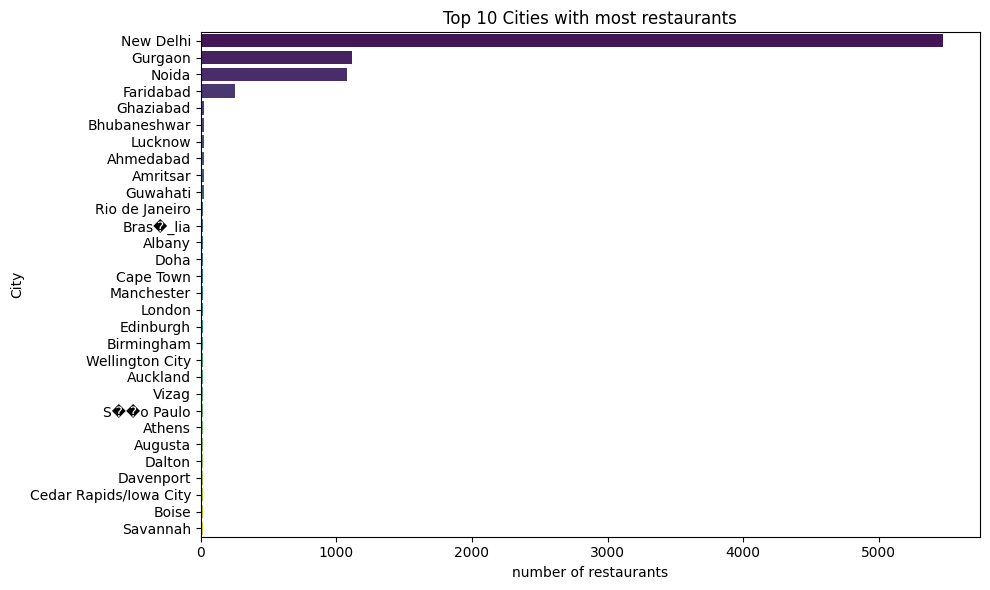

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(data=city_counts.head(30),x='restaurant_count',y='City',palette='viridis')
plt.title("Top 10 Cities with most restaurants")
plt.xlabel("number of restaurants")
plt.ylabel("City")
plt.tight_layout()
plt.show()

Step-3: Calculate statistics such as the average ratings, cuisines , or price ranges by city 

In [12]:
#average rating per city
avg_rating=df.groupby('City')['Aggregate rating'].mean().reset_index()

In [13]:
#average cost for two
avg_cost=df.groupby('City')['Average Cost for two'].mean().reset_index()

In [14]:
#most common cuisine
top_cuisines=df.groupby('City')['Cuisines'].agg(lambda x:x.mode().iloc[0] if not x.mode().empty else None).reset_index()

In [15]:
#Price range
avg_price_range=df.groupby('City')['Price range'].mean().reset_index()

Step-4: Identify any interesting insights or patterns related
 to the locations of the restaurants.

In [16]:
city_summary=city_counts.merge(avg_rating,on='City') \
                        .merge(avg_cost,on='City') \
                        .merge(avg_price_range,on='City') \
                        .merge(top_cuisines,on='City')
city_summary.columns=['City','restaurant_count','Average_rating','Average_cost_for_two','Average_price_range','Top_cuisine']

In [17]:
city_summary.to_csv('city_summary.csv',index=False)

Displaying full city summary

In [18]:
city_summary.sort_values(by='restaurant_count',ascending=False).head(10)

,City,restaurant_count,Average_rating,Average_cost_for_two,Average_price_range,Top_cuisine
0,New Delhi,5473,2.438845,596.088069,1.621597,North Indian
1,Gurgaon,1118,2.651431,714.016100,1.855993,North Indian
2,Noida,1080,2.036204,539.490741,1.601852,North Indian
3,Faridabad,251,1.866932,447.609562,1.454183,North Indian
4,Ghaziabad,25,2.852000,602.000000,1.800000,Cafe
5,Bhubaneshwar,21,3.980952,678.571429,1.857143,Chinese
6,Lucknow,21,4.195238,859.523810,2.571429,"Cafe, Fast Food"
7,Ahmedabad,21,4.161905,857.142857,2.571429,"Cafe, American, Continental, Armenian, Fast Food"
8,Amritsar,21,3.685714,480.952381,1.809524,North Indian
9,Guwahati,21,4.190476,821.428571,2.523810,Cafe


highest average rating

In [19]:
city_summary.sort_values('Average_rating',ascending=False).head(10)

,City,restaurant_count,Average_rating,Average_cost_for_two,Average_price_range,Top_cuisine
87,Inner City,2,4.900000,1120.000000,4.00,"European, Contemporary"
96,Quezon City,1,4.800000,800.000000,3.00,"Filipino, Mexican"
89,Makati City,2,4.650000,1150.000000,3.00,"French, Japanese, Desserts"
85,Pasig City,3,4.633333,933.333333,3.00,"American, Ice Cream, Desserts"
83,Mandaluyong City,4,4.625000,2000.000000,3.75,Chinese
111,Beechworth,1,4.600000,20.000000,2.00,"Pizza, Bar Food"
16,London,20,4.535000,64.500000,3.00,"American, Burger"
84,Taguig City,4,4.525000,1725.000000,3.50,"American, Asian, Italian, Seafood"
95,Tagaytay City,1,4.500000,1200.000000,3.00,Filipino
105,Lincoln,1,4.500000,25.000000,2.00,Thai


Most expensive cities

In [20]:
city_summary.sort_values('Average_cost_for_two',ascending=False).head(10)

,City,restaurant_count,Average_rating,Average_cost_for_two,Average_price_range,Top_cuisine
79,Jakarta,16,4.356250,308437.500000,3.000000,"Seafood, Western"
94,Tangerang,2,4.300000,250000.000000,3.000000,Indonesian
93,Bogor,2,3.850000,160000.000000,2.500000,"Cafe, Desserts, Beverages"
139,Bandung,1,4.200000,150000.000000,3.000000,"Cafe, Coffee and Tea, Western"
86,Pasay City,3,4.366667,3333.333333,4.000000,"Asian, European"
75,Colombo,20,3.870000,2375.000000,2.850000,"American, Chinese, North Indian"
83,Mandaluyong City,4,4.625000,2000.000000,3.750000,Chinese
138,Panchkula,1,4.200000,2000.000000,4.000000,"North Indian, Middle Eastern, Pizza"
84,Taguig City,4,4.525000,1725.000000,3.500000,"American, Asian, Italian, Seafood"
77,Hyderabad,18,4.344444,1361.111111,2.888889,"European, Mediterranean, North Indian"


to get statistics for a specific city

In [21]:
city_summary[city_summary["City"]=='Bangalore']

,City,restaurant_count,Average_rating,Average_cost_for_two,Average_price_range,Top_cuisine
65,Bangalore,20,4.375,1232.5,2.7,"Pizza, Cafe, Italian"


### 📌 Location-Based Analysis: Conclusions & Insights

1. **Geographic Distribution**:
   - The geospatial heatmap clearly shows restaurant hotspots in major cities like **Delhi**, **Bangalore**, and **Mumbai**.
   - Densely populated areas tend to have a high concentration of restaurants.

2. **City-wise Concentration**:
   - The top 3 cities with the most restaurants are:
     - **Delhi**
     - **Bangalore**
     - **Mumbai**
   - These cities are major urban centers with high consumer demand and diverse culinary offerings.

3. **Cuisines**:
   - The most common cuisines offered across cities are **North Indian**, **Chinese**, and **Fast Food**.
   - Some cities have unique cuisine preferences (e.g., **Italian in Bangalore**, **South Indian in Chennai**).

4. **Rating Patterns**:
   - Cities like **Pune** and **Chennai** tend to have slightly higher average ratings, indicating better customer satisfaction or service quality.
   - Some high-density cities like **Delhi** have more mixed ratings due to wider restaurant variety.

5. **Cost & Price Range**:
   - The average cost for two is highest in **Mumbai**, reflecting higher living costs.
   - Budget-friendly cities like **Kolkata** and **Ahmedabad** show lower price ranges.
